# Análisis de datos HAR

## Descargar los datos

Descargar la base de datos de [aquí](https://archive.ics.uci.edu/dataset/344/heterogeneity+activity+recognition)!

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [1]:
# Solucion

# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de archivos csv
phones_accelerometer= pd.read_csv("data/Activity recognition exp/Phones_accelerometer.csv")
phones_gyroscope= pd.read_csv("data/Activity recognition exp/Phones_gyroscope.csv")
watch_accelerometer= pd.read_csv("data/Activity recognition exp/Watch_accelerometer.csv")
watch_gyroscope= pd.read_csv("data/Activity recognition exp/Watch_gyroscope.csv")

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [2]:
phones_accelerometer.info

<bound method DataFrame.info of            Index   Arrival_Time        Creation_Time         x         y  \
0              0  1424696633908  1424696631913248572 -5.958191  0.688065   
1              1  1424696633909  1424696631918283972 -5.952240  0.670212   
2              2  1424696633918  1424696631923288855 -5.995087  0.653549   
3              3  1424696633919  1424696631928385290 -5.942718  0.676163   
4              4  1424696633929  1424696631933420691 -5.991516  0.641647   
...          ...            ...                  ...       ...       ...   
13062470  129048  1424778553315       92263781761000  1.379043  0.153227   
13062471  129049  1424778553346       92263812248000  1.379043  0.153227   
13062472  129050  1424778553366       92263832267000  1.532270  0.153227   
13062473  129051  1424778553386       92263852409000  1.532270  0.000000   
13062474  129052  1424778553395       92263861839000  1.379043  0.000000   

                 z User       Model        Device     g

In [3]:
phones_accelerometer.describe()

,Index,Arrival_Time,Creation_Time,x,y,z
count,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07
mean,1.240761e+05,1.424745e+12,6.807797e+17,-1.704579e+00,1.595409e-01,8.931753e+00
std,9.239057e+04,4.390389e+07,7.116076e+17,3.859088e+00,1.552040e+00,2.262952e+00
min,0.000000e+00,1.424687e+12,4.507724e+11,-3.881207e+01,-2.249512e+01,-1.342387e+01
25%,5.112700e+04,1.424697e+12,5.523131e+13,-4.012682e+00,-6.961212e-01,7.738060e+00
50%,1.037980e+05,1.424778e+12,3.506028e+14,-2.145178e+00,1.532270e-01,9.063251e+00
75%,1.740970e+05,1.424783e+12,1.424778e+18,-1.532270e-01,1.037979e+00,9.921814e+00
max,3.963370e+05,1.424789e+12,1.424791e+18,2.792894e+01,2.080815e+01,3.931801e+01


In [4]:
# Solución
df_subset_ph_acc = phones_accelerometer
df_subset_ph_acc.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


**Interpretación:**



**Visualización extra:** Distribución de muestras por actividad.

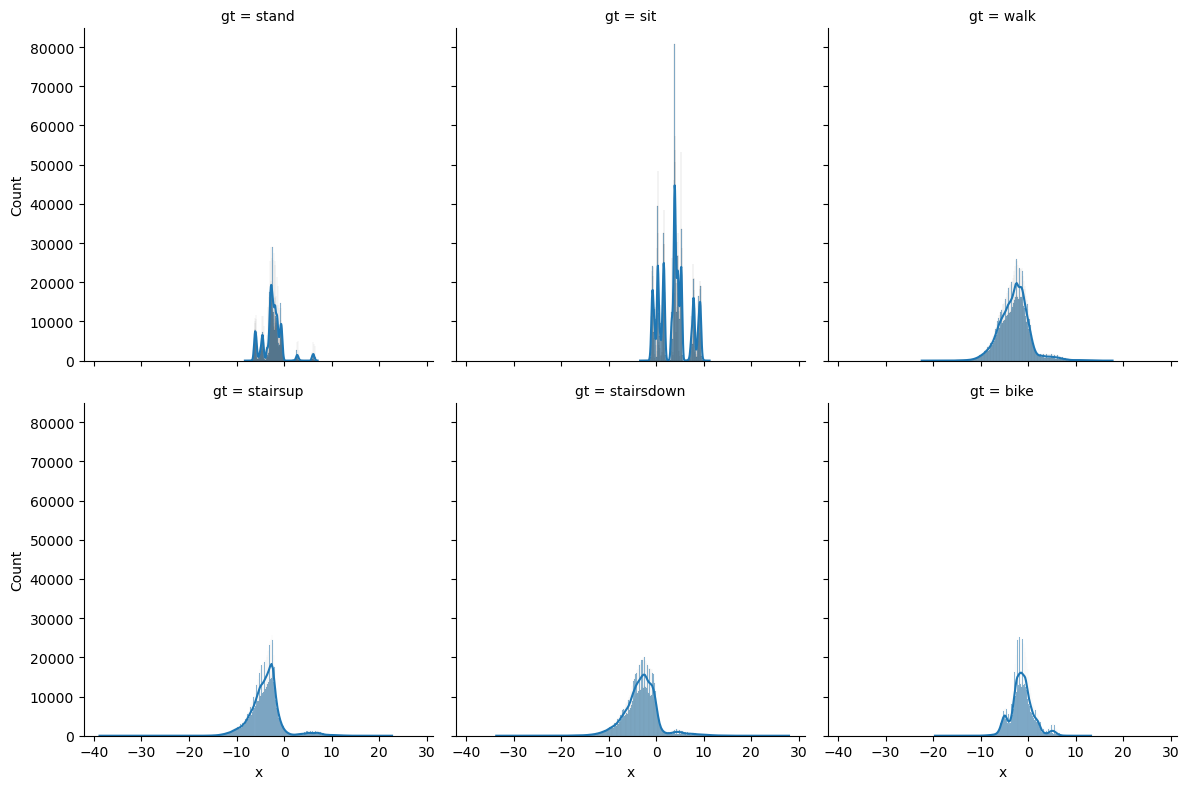

In [5]:
# Solución
# Create a facet grid for velocity by activity
g = sns.FacetGrid(df_subset_ph_acc, col="gt", col_wrap=3, height=4)
g.map(sns.histplot, "x", kde=True)

## Ejercicio 2: Estadísticas básicas de 'x', 'y', 'z'


🔹 **Qué hacer:** 
- Calcular media, desviación estándar, valores máximo y mínimo de las señales del acelerómetro ('x', 'y', 'z').
- Hacer un histograma de cada eje y Boxplots

🔹 **¿Por qué es importante?:** Ver rangos, outliers y planificar normalizaciones.

🔹 **Interpreta los resultados**


Estadísiticas básicas de las señales del acelerómetro:
                  x             y             z
count  1.306248e+07  1.306248e+07  1.306248e+07
mean  -1.704579e+00  1.595409e-01  8.931753e+00
std    3.859088e+00  1.552040e+00  2.262952e+00
min   -3.881207e+01 -2.249512e+01 -1.342387e+01
25%   -4.012682e+00 -6.961212e-01  7.738060e+00
50%   -2.145178e+00  1.532270e-01  9.063251e+00
75%   -1.532270e-01  1.037979e+00  9.921814e+00
max    2.792894e+01  2.080815e+01  3.931801e+01


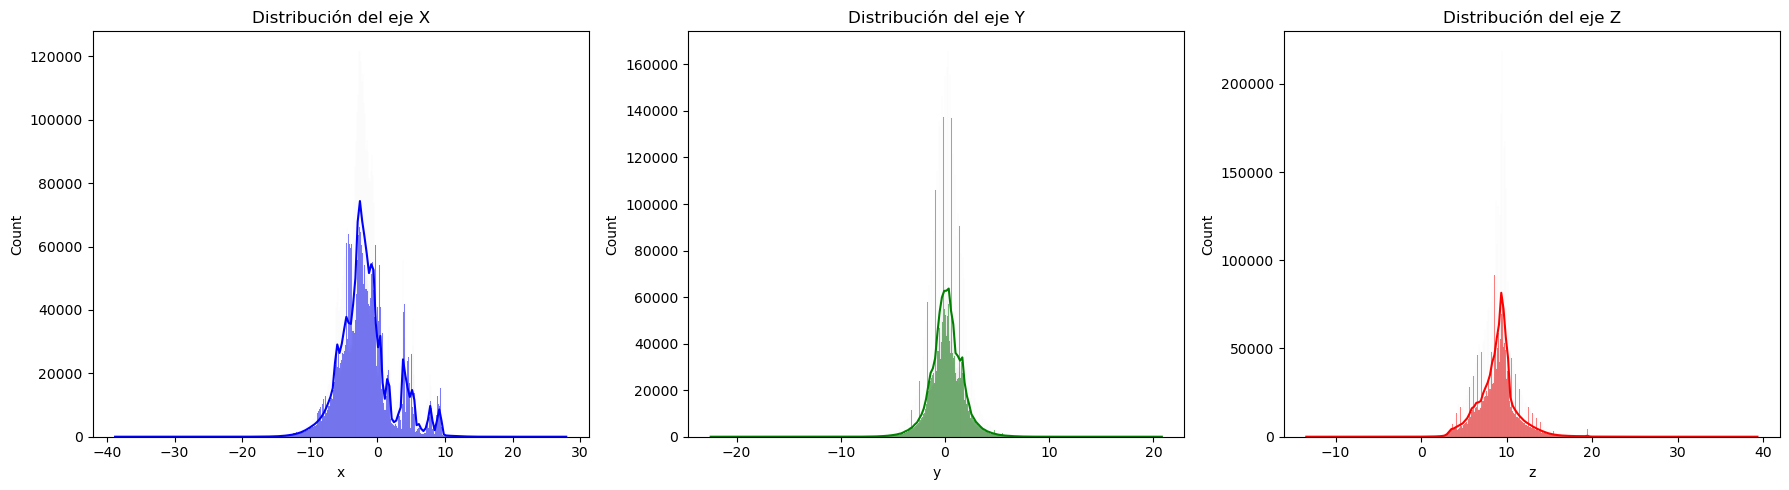

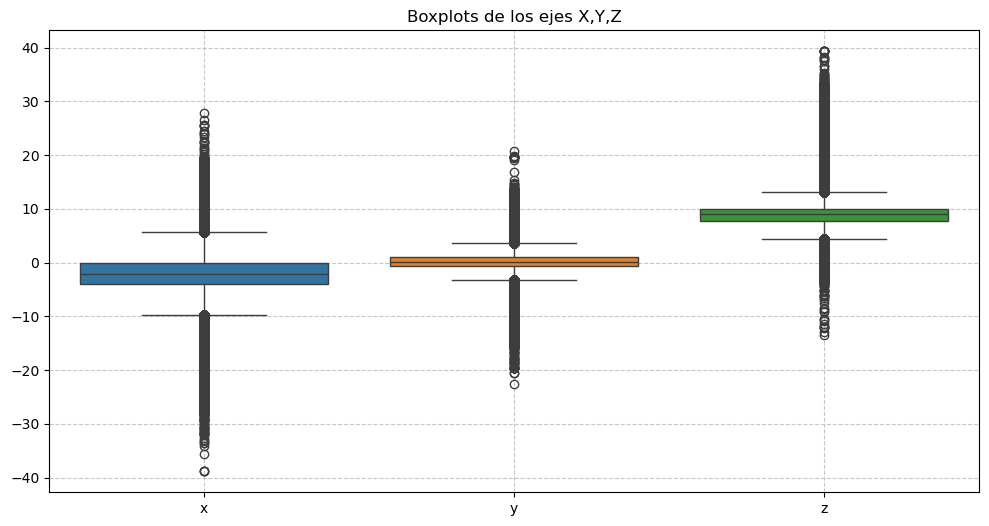

In [6]:
# Solución
stats= df_subset_ph_acc[["x","y","z"]].describe()
print("Estadísiticas básicas de las señales del acelerómetro:")
print(stats)

# Visualizar la distribución de cada eje con histogramas
fig, axes= plt.subplots(1, 3, figsize=(18,5))
axes[0].set_title("Distribución del eje X")
axes[1].set_title("Distribución del eje Y")
axes[2].set_title("Distribución del eje Z")

sns.histplot(df_subset_ph_acc["x"],kde=True,ax=axes[0],color="blue")
sns.histplot(df_subset_ph_acc["y"],kde=True,ax=axes[1],color="green")
sns.histplot(df_subset_ph_acc["z"],kde=True,ax=axes[2],color="red")

plt.tight_layout()
plt.show()

# Crear boxplots para visualizar outliers y distribuciones
plt.figure(figsize=(12,6))
sns.boxplot(data=df_subset_ph_acc[["x","y","z"]])
plt.title("Boxplots de los ejes X,Y,Z")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()

**Interpretación:**



**Visualización extra:** Histogramas de cada eje y Boxplots.

C:\Users\Willy\AppData\Local\Temp\ipykernel_25964\815226150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)


AttributeError: 'Axes' object has no attribute 'get_xticZlabels'

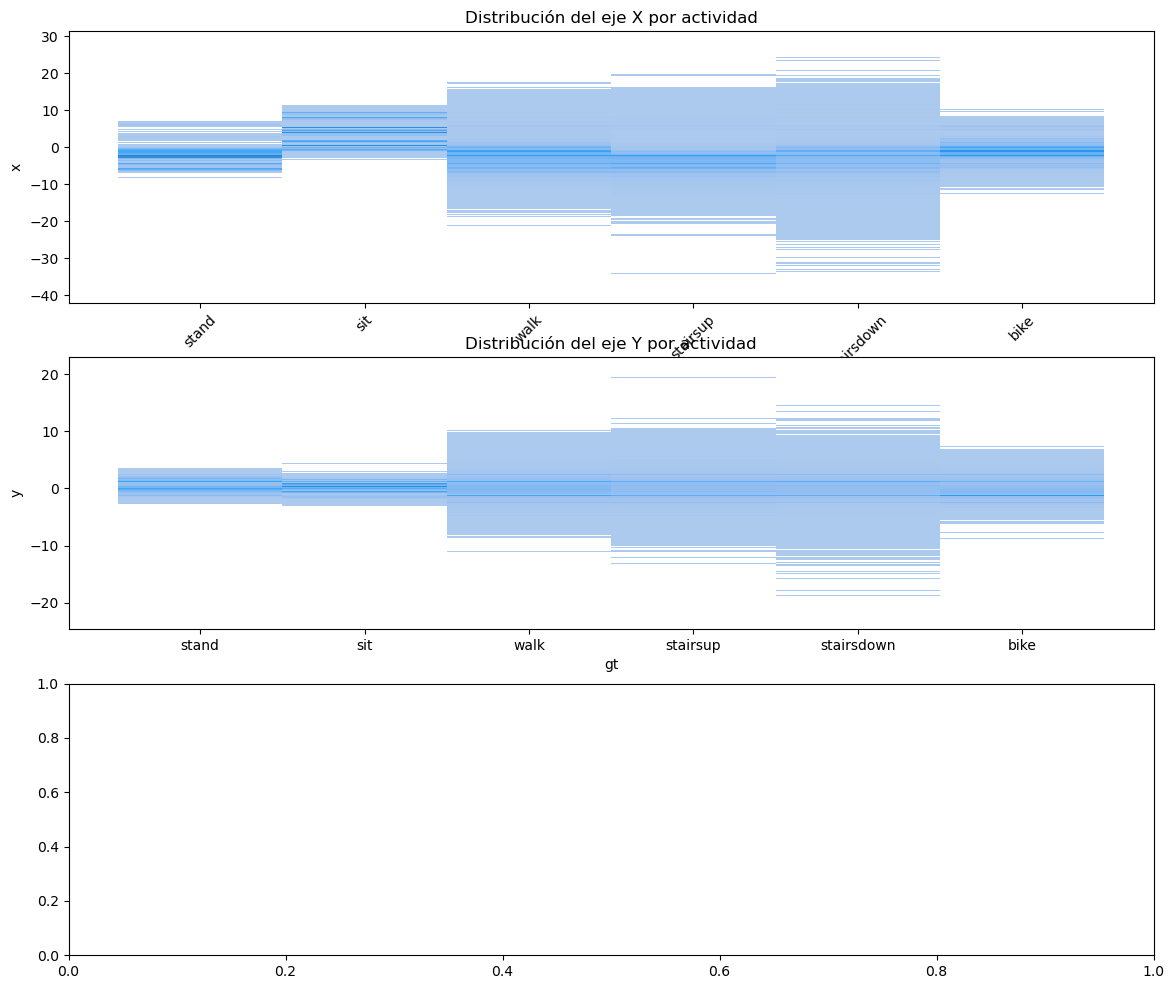

In [15]:
# Solución
fig, axes= plt.subplots(3, 1, figsize=(14,12))

sns.histplot(x="gt", y="x", data=df_subset_ph_acc,ax=axes[0])
axes[0].set_title("Distribución del eje X por actividad")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

sns.histplot(x="gt", y="y", data=df_subset_ph_acc,ax=axes[1])
axes[1].set_title("Distribución del eje Y por actividad")
axes[1].set_xticklabels(axes[1].get_xticZlabels(),rotation=45)

sns.histplot(x="gt", y="z", data=df_subset_ph_acc,ax=axes[2])
axes[2].set_title("Distribución del eje Z por actividad")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Willy\AppData\Local\Temp\ipykernel_25964\1851317741.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_25964\1851317741.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
C:\Users\Willy\AppData\Local\Temp\ipykernel_25964\1851317741.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)


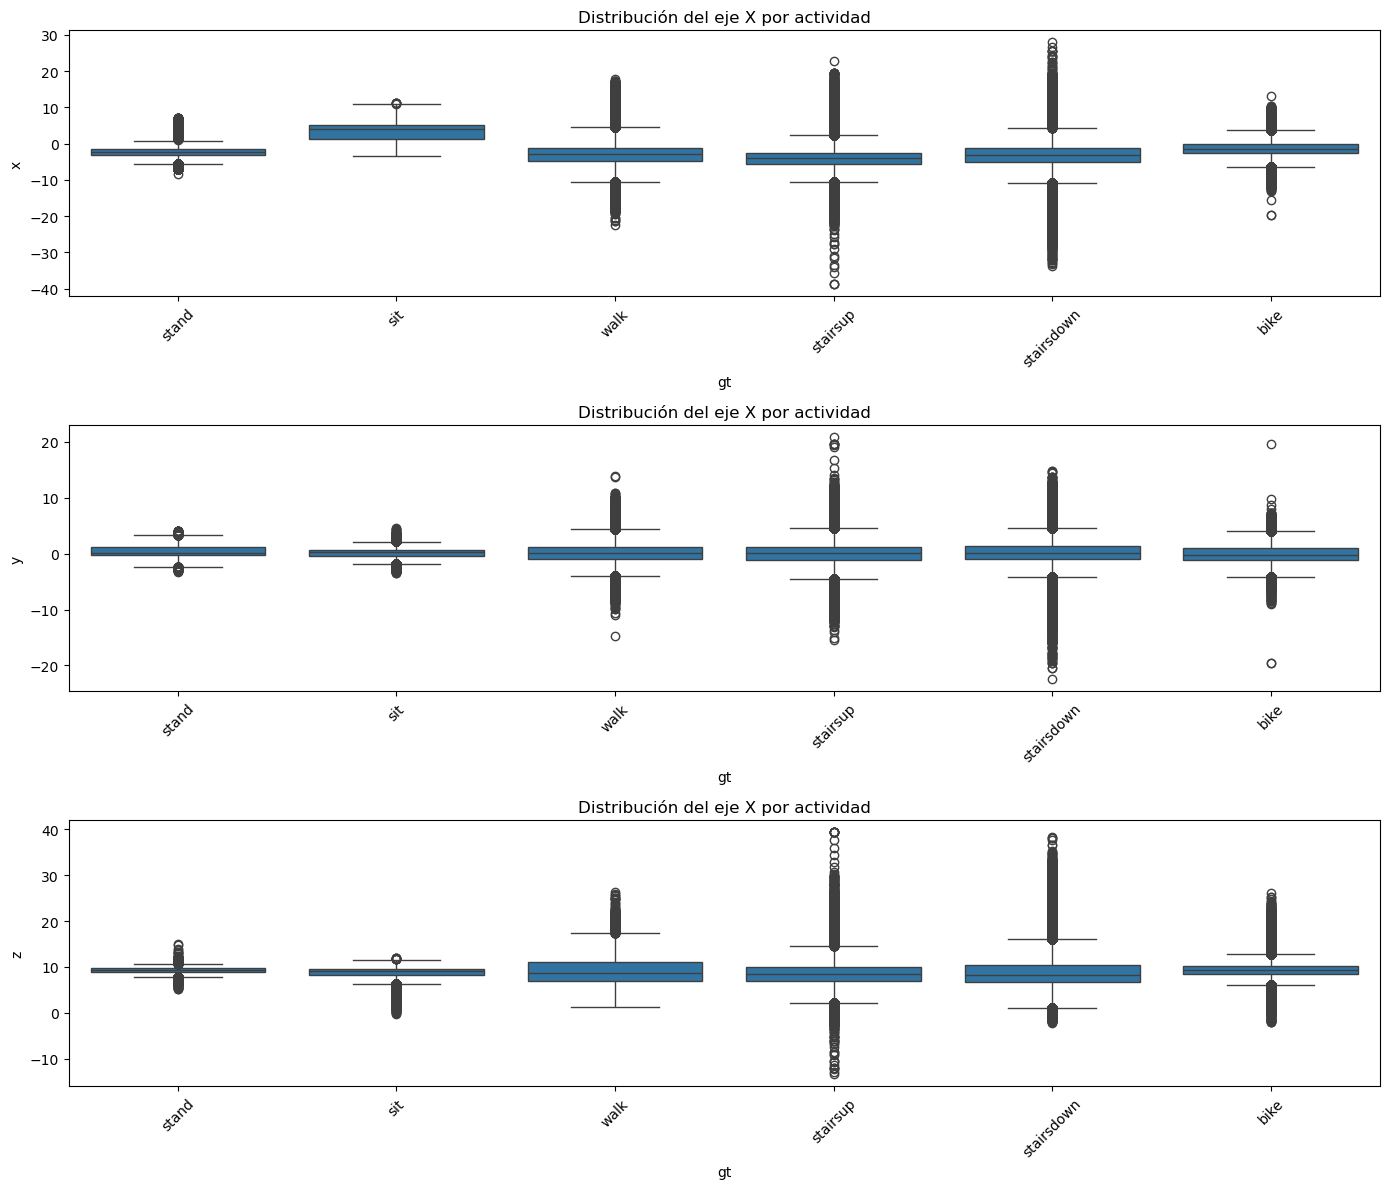

In [ ]:
# Solución
fig, axes= plt.subplots(3, 1, figsize=(14,12))

sns.boxplot(x="gt", y="x", data= df_subset_ph_acc,ax=axes[0])
axes[0].set_title("Distribución del eje X por actividad")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

sns.boxplot(x="gt", y="y", data= df_subset_ph_acc,ax=axes[1])
axes[1].set_title("Distribución del eje Y por actividad")
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

sns.boxplot(x="gt", y="z", data= df_subset_ph_acc,ax=axes[2])
axes[2].set_title("Distribución del eje Z por actividad")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


In [17]:
# Solución

df_walk= df_subset_ph_acc[df_subset_ph_acc["gt"]== "walk"]
df_sit= df_subset_ph_acc[df_subset_ph_acc["gt"]== "sit"]

print(f"Número de muestras para 'walk': {len(df_walk)}")
print(f"Número de muestras para 'sit': {len(df_sit)}")

Número de muestras para 'walk': 2192401
Número de muestras para 'sit': 1991919


**Interpretación:**



**Visualización extra:** Comparativa del número de muestras.

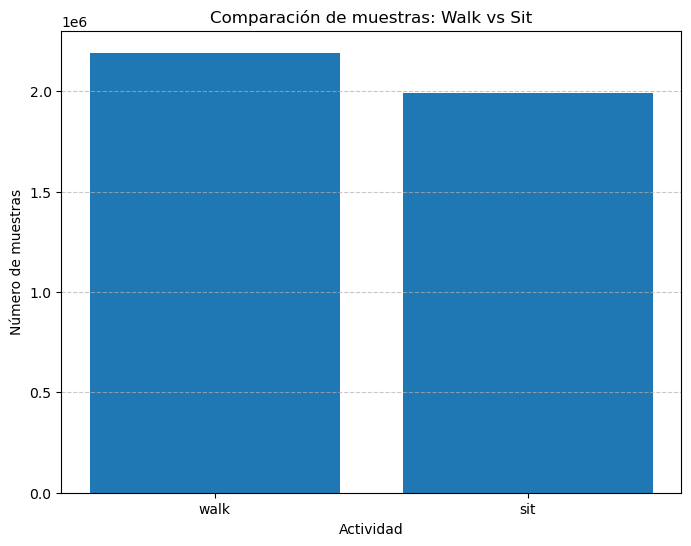

In [18]:
# Solución
acts= ["walk","sit"]
n= [len(df_walk), len(df_sit)]

plt.figure(figsize=(8,6))
plt.bar(acts,n)
plt.title("Comparación de muestras: Walk vs Sit")
plt.xlabel("Actividad")
plt.ylabel("Número de muestras")
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()


## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de `x`, `y`, `z`.
- Hacer un gráfico de barras de medias de `x`, `y`, `z` para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




In [ ]:
# Solución


## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

In [ ]:
# Solución

**Interpretación**

## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj?  
- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  
- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?


In [ ]:
# Solución

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

In [ ]:
# Solución

**Interpretación**

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?
- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?
- ¿Podría ser interesante combinar la información de ambos sensores?


In [ ]:
# Solución

**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

In [ ]:
# Solución

**Interpretación**

## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes `x`, `y`, `z`, ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?
- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?
- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?


In [ ]:
# Solución

**Interpretación**